In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.neural_network
import sklearn.model_selection
import pandas as pd

In [3]:
data = pd.read_csv('data.csv')

# Descripción del Data Set
Conjunto de 5 diferentes resultados para determinar si un paciente tiene o no un grado determinado de epilepsia.

In [4]:
data.keys()

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       ...
       'X170', 'X171', 'X172', 'X173', 'X174', 'X175', 'X176', 'X177', 'X178',
       'y'],
      dtype='object', length=180)

In [5]:
Y=data['y']

In [7]:
data=data.drop('y',axis=1)
data=data.drop('Unnamed: 0',axis=1)

In [8]:
predictors=data.keys()
n = len(data[predictors])
X = np.array(data[predictors]).reshape((n, -1))

In [9]:
print(np.shape(X),np.shape(Y))

(11500, 178) (11500,)


In [10]:
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.5)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [46]:
clf = LogisticRegression(C=0.1, penalty='l1', solver='saga', tol=0.1)
clf.fit(x_train, y_train)
f_log=sklearn.metrics.f1_score(y_test, clf.predict(x_test), average='macro')
print('El f1 de la regresión logística es: '+str(f_log))

El f1 de la regresión logística es: 0.2044533835087484


# Parte 1

In [37]:
f=[]
for i in range(5):
    mlp = sklearn.neural_network.MLPClassifier(activation='logistic', 
                                           hidden_layer_sizes=(i+1), 
                                           max_iter=200)
    mlp.fit(x_train, y_train)
    f.append(sklearn.metrics.f1_score(y_test, mlp.predict(x_test), average='macro'))

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn'

Text(0, 0.5, 'F1 Score')

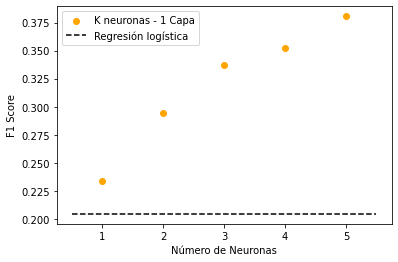

In [47]:
x=np.arange(1,6)
plt.scatter(x,f,color='orange',label='K neuronas - 1 Capa')
plt.hlines(f_log,xmin=0.5,xmax=5.5,linestyles='dashed',label='Regresión logística')
plt.legend(loc=0.0)
plt.xlabel('Número de Neuronas')
plt.ylabel('F1 Score')

# Parte 2

In [36]:
f1=[]
for j in range(3):
    a=[]
    for i in range(5):
        mlp = sklearn.neural_network.MLPClassifier(activation='logistic', 
                                           hidden_layer_sizes=(j+1,i+1), 
                                           max_iter=200)
        mlp.fit(x_train, y_train)
        a.append(sklearn.metrics.f1_score(y_test, mlp.predict(x_test), average='macro'))
    f1.append(a)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn'

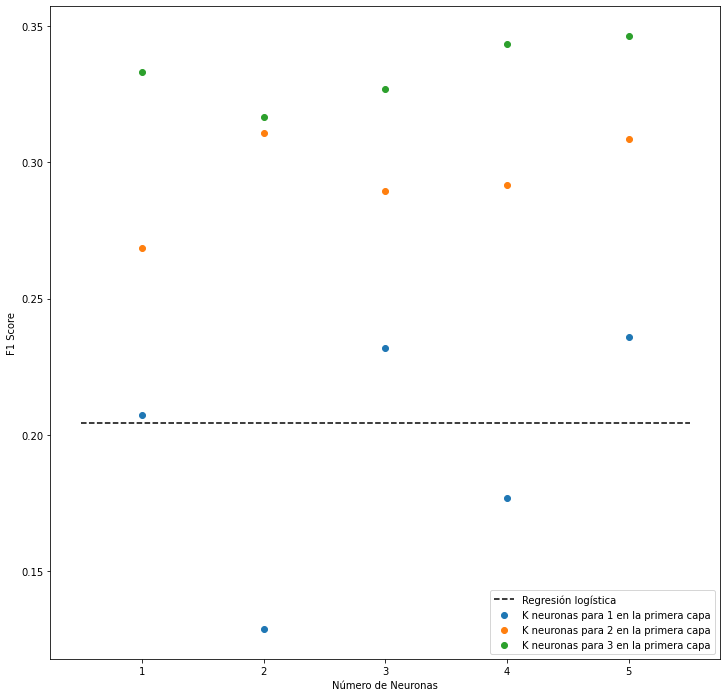

In [48]:
plt.figure(figsize=(12,12))
plt.hlines(f_log,xmin=0.5,xmax=5.5,linestyles='dashed',label='Regresión logística')
for j in range(3):
    k=j+1
    plt.scatter(x,f1[j],label='K neuronas para '+str(k)+' en la primera capa')    
    plt.legend(loc=0.0)
    plt.xlabel('Número de Neuronas')
    plt.ylabel('F1 Score')

# Comentarios:
Respecto a la regresión logística, se observa que las redes neuronales más sencillas (Con una sola capa oculta) logran superar con facilidad el F1 score de la Regresión logística.
Un suceso equivalente sucede al aumentar la complejidad de la red neuronal.

Sin embargo, al aumentar la complejidad de las redes neuronales se observa que NO logran superar el máximo F1 obtenido con una sola capa oculta, aunque si logra superar el F1 de la regresión logística después de cierta complejidad.
Luego parece no tener la suficiente ganancia en complejidad.